# Benchmark ComBind on PDB ligands

In [1]:
import numpy as np
from glob import glob
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def benchmark(results):
    tot = 0
    for prot, ligs in results.items():
        print prot, len(ligs[0])
        tot += len(ligs[0])
    print tot
        
    
    x, y = [], []
    for prot, ligs in results.items():
        for lig, (combind, glide, best) in ligs[0].items():
            x += [glide]
            y += [combind]

    # All ligands separately
    print ttest_rel(x, y)
    f, ax = plt.subplots()
    plt.scatter(x, y, alpha = 0.5, s = 10)
    plt.xlabel('Glide', fontsize = 16)
    plt.ylabel('ComBind', fontsize = 16)
    plt.title('All Ligands RMSD', fontsize = 20)
    plt.xlim(0, 15)
    plt.ylim(0, 15)
    plt.xticks(range(0, 15, 2), range(0, 15, 2))
    ax.set_aspect('equal', 'box')
    print 'Glide Average:  ', sum(x) / float(len(x)), sum(np.array(x) <= 2.0) /  float(len(x))
    print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))
    plt.show()

    # By Protein (RMSD)
    x, y, label = [], [], []
    for prot, ligs in results.items():
        _x, _y = [], []
        for lig, (combind, glide, best) in ligs[0].items():
            #if best > 2.0: continue
            _x += [glide]
            _y += [combind]
        label += [prot]
        x += [sum(_x)/float(len(_x))]
        y += [sum(_y)/float(len(_y))]

    markers = ['o', 'v', 'x', 's']
    f, ax = plt.subplots()
    for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
        plt.scatter(_x, _y, marker = markers[i/10], label = _label)
    plt.xlabel('Glide', fontsize = 16)
    plt.ylabel('ComBind', fontsize = 16)
    plt.title('Mean RMSD', fontsize = 20)
    plt.plot(range(10), linestyle='--', c = 'k')
    ax.set_aspect('equal', 'box')
    print 'Mean RMSD Glide:   ', sum(x) / float(len(x))
    print 'Mean RMSD Combind: ',sum(y) / float(len(y))
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()
    
    # By protein (% correct)
    x, y = [], []
    for prot, ligs in results.items():
        _x, _y = [], []
        for lig, (combind, glide, best) in ligs[0].items():
            _x += [glide <= 2.0]
            _y += [combind <= 2.0]
        label += [prot]
        x += [sum(_x)/float(len(_x))]
        y += [sum(_y)/float(len(_y))]

    markers = ['o', 'v', 'x', 's']
    f, ax = plt.subplots()
    for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
        plt.scatter(_x, _y, marker = markers[i/10], label = _label)
    plt.xlabel('Glide', fontsize = 16)
    plt.ylabel('ComBind', fontsize = 16)
    plt.plot(range(2), linestyle='--', c = 'k')
    plt.title('Fraction Near-Native', fontsize = 20)
    ax.set_aspect('equal', 'box')
    print 'Fraction Near-Native Glide:   ', sum(x) / float(len(x))
    print 'Fraction Near-Native Combind: ',sum(y) / float(len(y))
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=0.68578984320438752, pvalue=0.49317063838933739)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.90842660038 0.440816326531


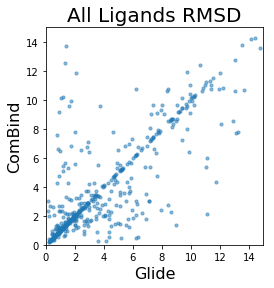

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.95731735549


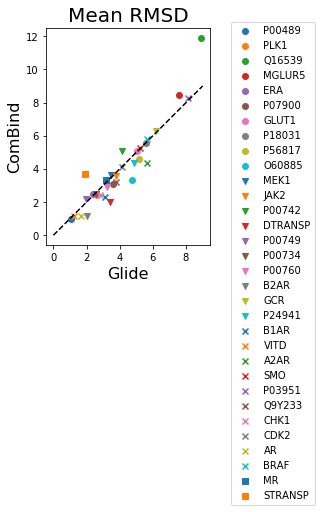

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.449484255022


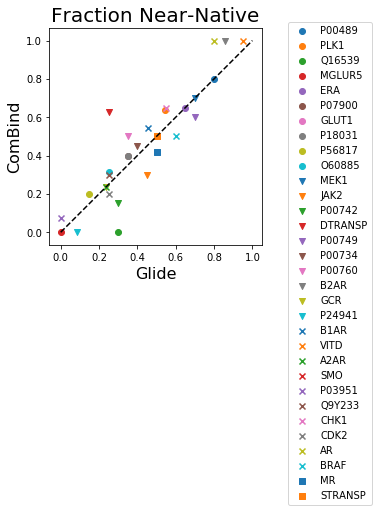

In [16]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))
for fname in glob('../../../combind_data/bpp_data/*/scores/pdb_stats6_pipi/*.sc'):
    if fname[-6:] != 'pdb.sc': continue
    prot = fname.split('/')[5]
    if prot not in results: results[prot] = [{}, {}]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1][lig] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=2.1121695833975567, pvalue=0.035178345324426326)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.79286749285 0.440816326531


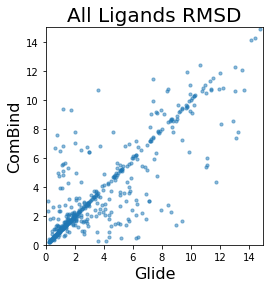

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.87939930728


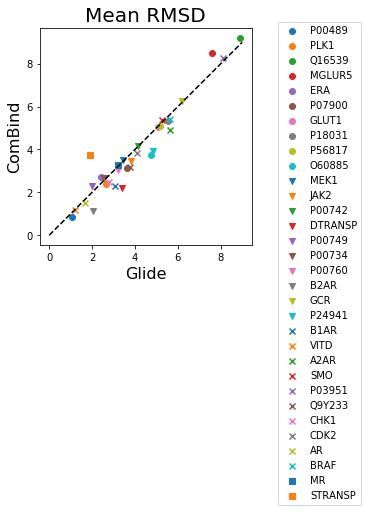

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.444299595931


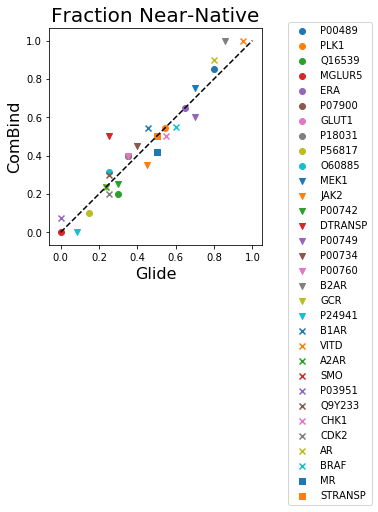

In [15]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))
for fname in glob('../../../combind_data/bpp_data/*/scores/pdb_stats6_seperated/*.sc'):
    if fname[-6:] != 'pdb.sc': continue
    prot = fname.split('/')[5]
    if prot not in results: results[prot] = [{}, {}]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1][lig] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=2.7883120066059202, pvalue=0.0055048150376651866)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.76077798346 0.459183673469


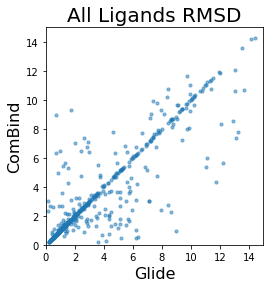

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.8789461262


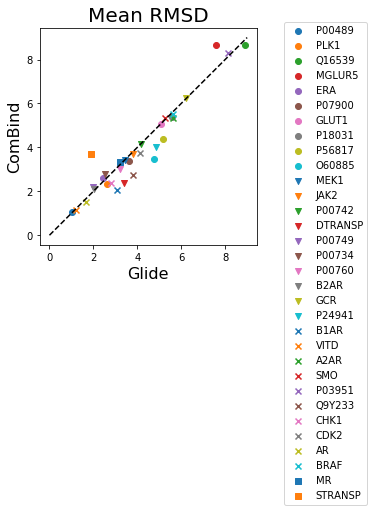

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.461363552195


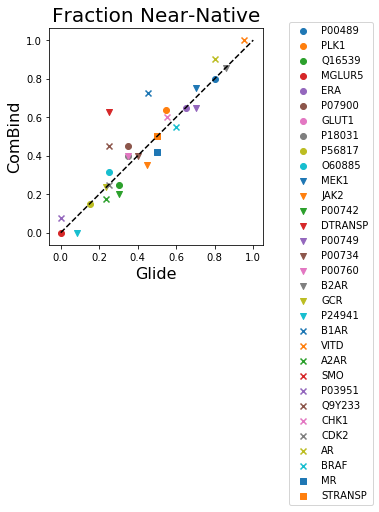

In [13]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))
for fname in glob('../../../combind_data/bpp_data/*/scores/pdb_stats6/*.sc'):
    if fname[-6:] != 'pdb.sc': continue
    prot = fname.split('/')[5]
    if prot not in results: results[prot] = [{}, {}]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1][lig] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=3.4183365283871594, pvalue=0.00068267950245698005)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.70089549795 0.467346938776


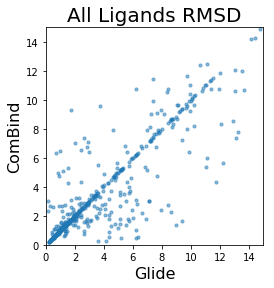

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.74422533191


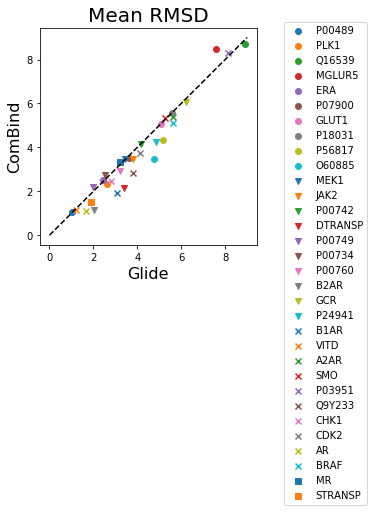

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.485856247001


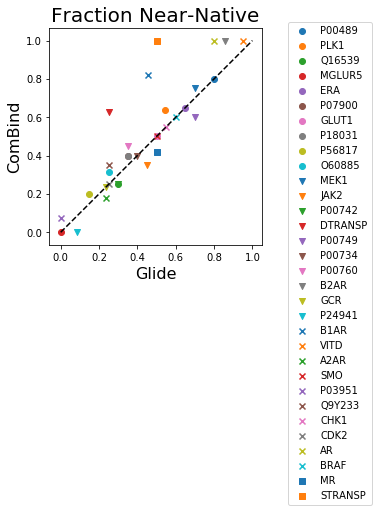

In [12]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))
for fname in glob('../../../combind_data/bpp_data/*/scores/pdb_stats6_2/*.sc'):
    if fname[-6:] != 'pdb.sc': continue
    prot = fname.split('/')[5]
    if prot not in results: results[prot] = [{}, {}]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1][lig] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=1.6141885446060937, pvalue=0.1071315891007401)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.83344033553 0.448979591837


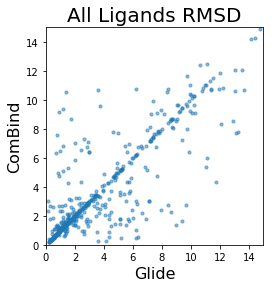

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.85403884108


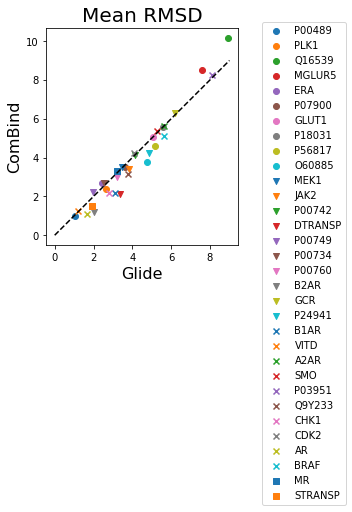

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.467958519728


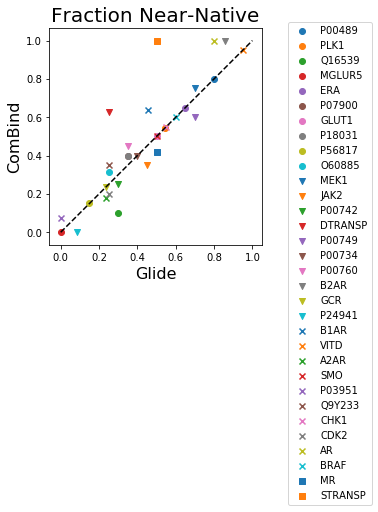

In [14]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))
for fname in glob('../../../combind_data/bpp_data/*/scores/pdb_stats6_3/*.sc'):
    if fname[-6:] != 'pdb.sc': continue
    prot = fname.split('/')[5]
    if prot not in results: results[prot] = [{}, {}]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1][lig] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=0.82125845155582966, pvalue=0.41189926925005615)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.92576184668 0.442857142857


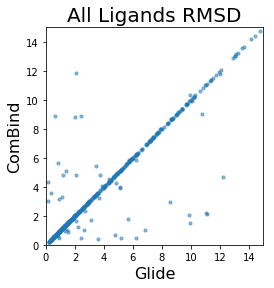

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.9009731081


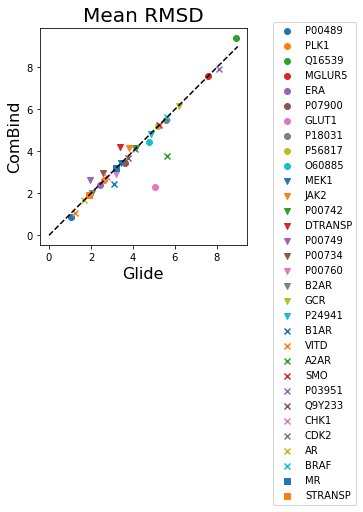

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.437728302641


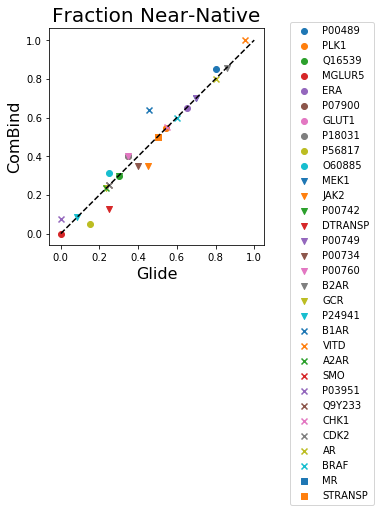

In [3]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb_crystal_only_mcss/*.sc'):
    if fname[-6:] == 'pdb.sc': continue
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, {}]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1][lig] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

benchmark(results)

 P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=1.9691157628860709, pvalue=0.049503978927077537)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.87228506956 0.455102040816


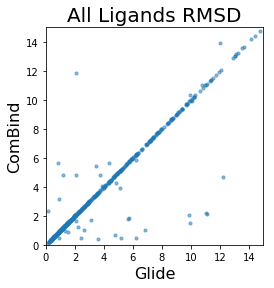

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.92128511086


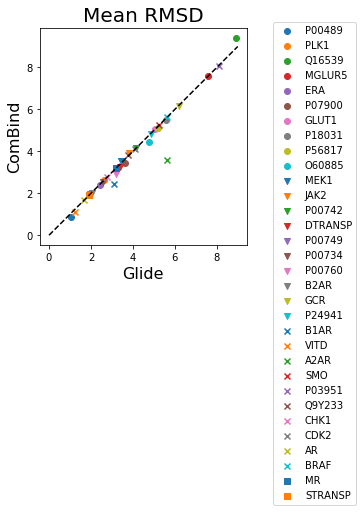

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.452066537935


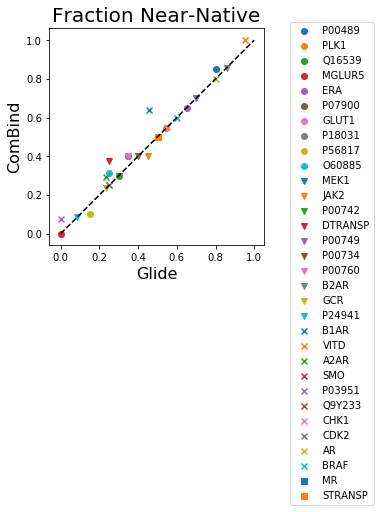

In [6]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb_crystal_only_mcss_increasedgscore/*.sc'):
    if fname[-6:] == 'pdb.sc': continue
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, {}]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1][lig] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=-0.75679191992735118, pvalue=0.44953899991452917)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 4.03409623677 0.426530612245


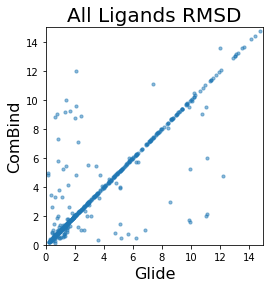

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.99296715471


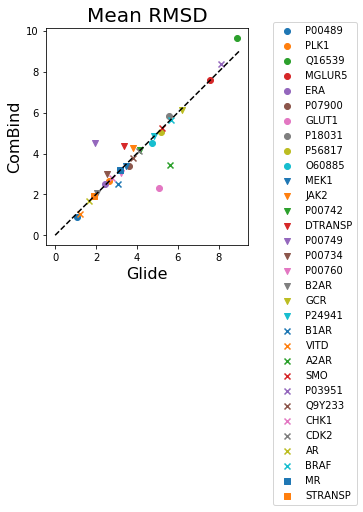

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.42338428269


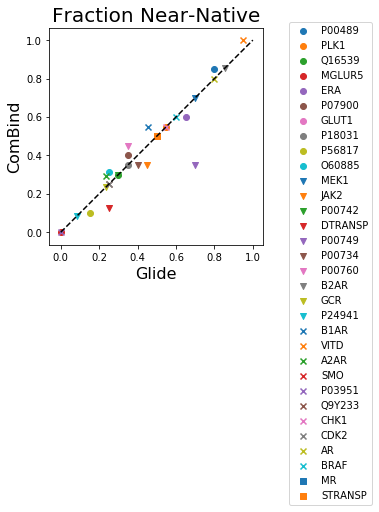

In [7]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb_crystal_only_mcss_nogscore/*.sc'):
    if fname[-6:] == 'pdb.sc': continue
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, {}]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1][lig] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=0.29827882398546474, pvalue=0.76561706342321134)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.95013057344 0.432653061224


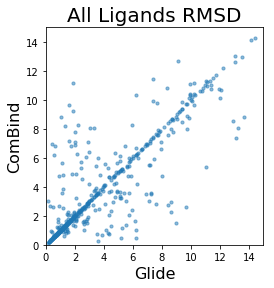

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.97488958764


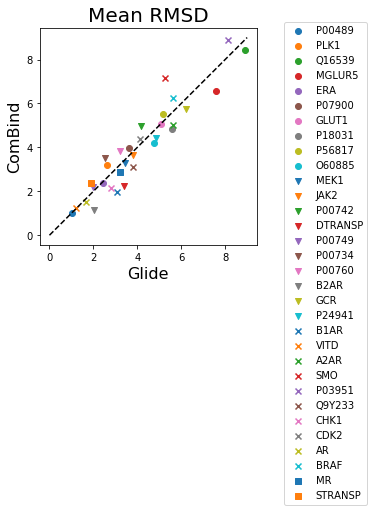

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.442277238693


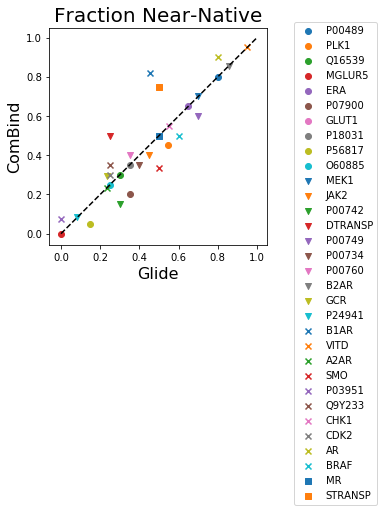

In [3]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb_crystal_only/*.sc'):
    if fname[-6:] == 'pdb.sc': continue
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, None]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 
                
benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=3.4955310770233519, pvalue=0.00051618486659158478)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.71185590111 0.451020408163


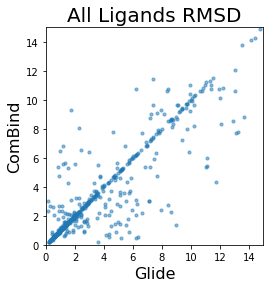

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.80238718875


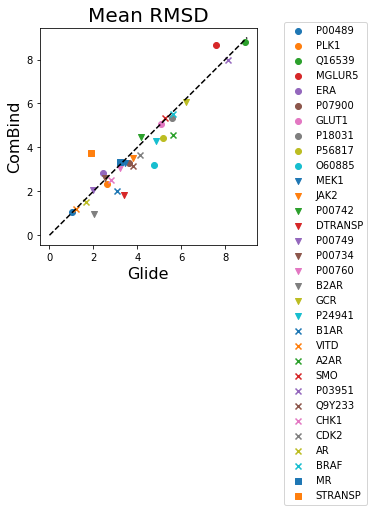

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.459132419358


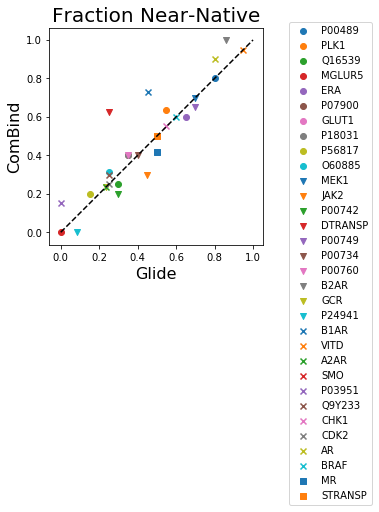

In [4]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb/*.sc'):
    if fname[-6:] != 'pdb.sc': continue
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, None]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 
                
benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=3.7332013846056382, pvalue=0.00021129532703196215)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.68977422516 0.45306122449


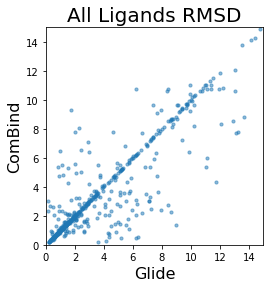

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.63852807644


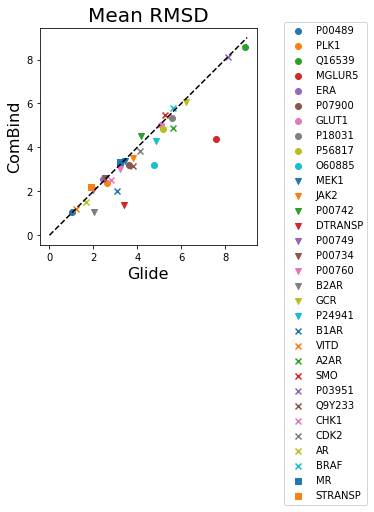

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.468010260267


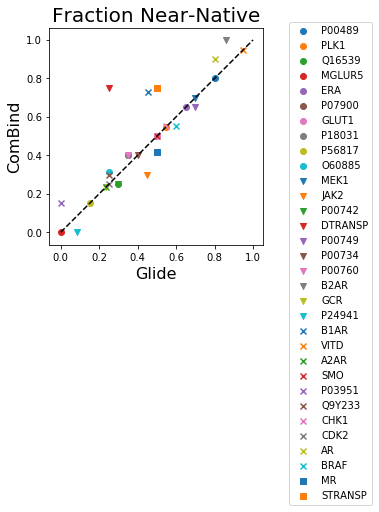

In [5]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb_crystal/*.sc'):
    if fname[-6:] != 'pdb.sc': continue
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, None]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 
                
benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
P18031 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00734 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
A2AR 17
SMO 6
P03951 13
Q9Y233 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
490
Ttest_relResult(statistic=1.2615949318814166, pvalue=0.207696044466438)
Glide Average:   3.97570252778 0.436734693878
ComBind Average: 3.85638974722 0.442857142857


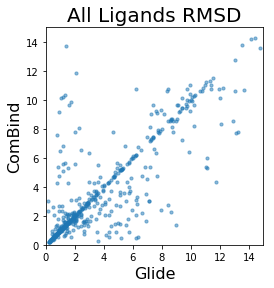

Mean RMSD Glide:    4.02396386295
Mean RMSD Combind:  3.91486303078


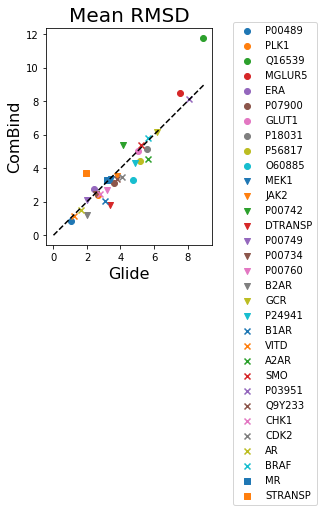

Fraction Near-Native Glide:    0.431595763305
Fraction Near-Native Combind:  0.451604010267


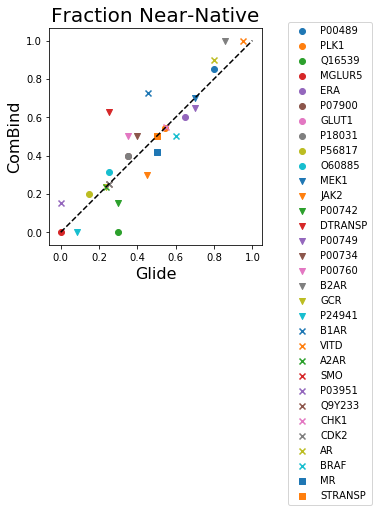

In [25]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb2/*.sc'):
    if fname[-6:] != 'pdb.sc': continue
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, None]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 
                
benchmark(results)

P00489 20
PLK1 11
Q16539 20
MGLUR5 4
ERA 20
P07900 20
GLUT1 2
Q9Y233 20
P56817 20
O60885 16
MEK1 20
JAK2 20
P00742 20
DTRANSP 8
P00749 20
P00760 20
B2AR 7
GCR 17
P24941 12
B1AR 11
VITD 20
P00734 20
SMO 6
P03951 13
P18031 20
CHK1 20
CDK2 20
AR 10
BRAF 20
MR 12
STRANSP 4
473
Ttest_relResult(statistic=1.2314778171281817, pvalue=0.21875741786785449)
Glide Average:   3.91665134384 0.443974630021
ComBind Average: 3.79929787114 0.452431289641


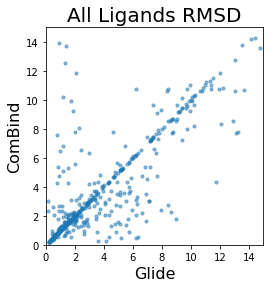

Mean RMSD Glide:    3.97252028174
Mean RMSD Combind:  3.81122168627


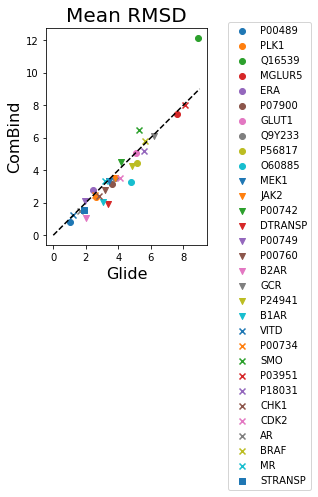

Fraction Near-Native Glide:    0.437928074456
Fraction Near-Native Combind:  0.46933443691


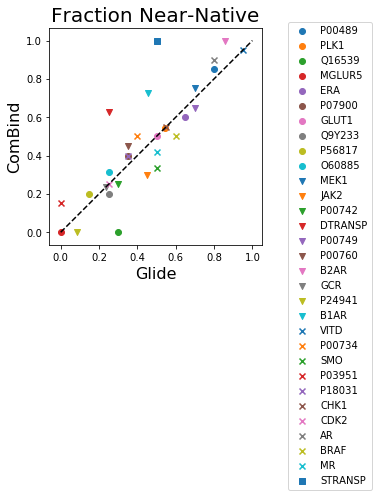

In [24]:
results = {} # prot -> ({ligand: (combind, glide, best)...}, (combind, glide, best))

for fname in glob('../../combind_data/bpp_data/*/scores/pdb3/*.sc'):
    if fname[-6:] != 'pdb.sc': continue
    prot = fname.split('/')[4]
    if prot not in results: results[prot] = [{}, None]
    with open(fname) as fp:
        fp.readline()
        for line in fp:
            tok = line.strip().split(',')
            if len(tok) == 3:
                results[prot][1] = map(lambda x: float(x.split('=')[1]), tok)
            else:
                lig,combind_rank,combind_rmsd,glide_rank,glide_rmsd,best_rank,best_rmsd = tok
                if combind_rmsd == '0': continue
                results[prot][0][lig] = (float(combind_rmsd), float(glide_rmsd), float(best_rmsd)) 

benchmark(results)